# Battle of Neighborhoods

## Finding the most suitable housing in London, based on the housing prices and school rating

#### Problem description: 

London has always been attracting immigrants of various professions, backgrounds, and life plans. Being one of the most diverse cities it attracts people from all over the world. 

To move somewhere is never an easy decision. The purpose of this project is to explore neighborhoods of London and see which neighborhoods are particularly attractive for certain immigrants.

Lets hypothetically take a family of three, who needs an average space but is very strict about picking the best possible school for their 6-year-old. As they are coming from Asia, they are interested in Chinese restaurants and other Chinese facilities located in their neighborhood. And, of course, they have a certain budget. 

#### Data description:

We are going to review several datasets:
Housing prices by neighborhood, refined dataset, raw dataset source https://data.london.gov.uk/dataset/average-private-rents-borough
School rating by neighborhood (reviewing csv file) 
Asian restaurants proximity (using the Foursquare API)

#### Libraries:

For this project, a number of libraries shall be used like matplotlib, geopy, pandas



In [160]:
# The code was removed by Watson Studio for sharing.

,Code,Area,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [161]:
print(df_london.shape)

(33, 84)


In [162]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city ="London"
country ="Uk"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 51.5073219 
longtitude is:- -0.1276474


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [163]:
!pip install folium

In [164]:
import folium
london = folium.Map(location=[51.5073219, -0.1276474])
london

## Problem 1: Housing prices by neighborhood

##### The family has decided to chose the following Areas in London: Barking and Dagenham Barnet Bexley Brent Bromley Camden Croydon Ealing Enfield Greenwich Hackney Hammersmith and Fulham Haringey Harrow Havering Hillingdon Hounslow Islington Kensington and Chelsea Kingston upon Thames Lambeth Lewisham Merton Newham Redbridge Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest Wandsworth Westminster

##### Let's create a dataframe with:
###### - specific areas listed above
###### - keep only Two Bedroom option

In [165]:
body = client_a45dc0d5df144c1b8084138592292515.get_object(Bucket='capstone-donotdelete-pr-zr9fcd12hojrew',Key='rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.

df_rent = pd.read_csv(body)
df_rent.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
0,2019,Q1,E09000002,Barking and Dagenham,Room,10,650,600,650,700
1,2019,Q1,E09000003,Barnet,Room,50,602,550,588,650
2,2019,Q1,E09000004,Bexley,Room,40,577,550,585,672
3,2019,Q1,E09000005,Brent,Room,90,638,500,602,700
4,2019,Q1,E09000006,Bromley,Room,40,569,450,585,650


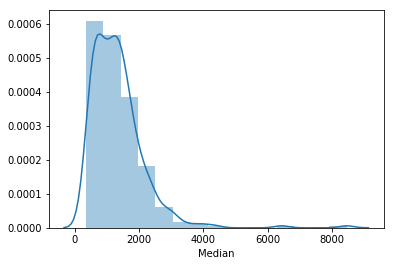

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_rent['Median'],bins=15)

In [167]:
rent2b = df_rent[df_rent['Category'] == 'Two Bedroom']
rent2b.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
130,2019,Q1,E09000001,City of London,Two Bedroom,30,2852,2383,2578,2925
131,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,320,1185,1100,1200,1300
132,2019,Q1,E09000003,Barnet,Two Bedroom,1190,1439,1295,1400,1500
133,2019,Q1,E09000004,Bexley,Two Bedroom,310,1076,995,1050,1200
134,2019,Q1,E09000005,Brent,Two Bedroom,710,1514,1350,1499,1630


In [168]:
frent1 = rent2b.loc[rent2b['Code'].isin(['E09000001','E09000002','E09000003','E09000004','E09000005','E09000006','E09000007','E09000008','E0900009','E090000010','E09000011','E09000012','E09000013','E09000014','E09000015','E09000016','E09000017','E09000018','E09000019','E09000020','E09000021','E09000022','E09000023','E09000024','E09000025','E09000026','E09000027','E09000028','E09000029','E09000030','E09000031','E09000032','E09000033'])]

In [169]:
frent1.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
130,2019,Q1,E09000001,City of London,Two Bedroom,30,2852,2383,2578,2925
131,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,320,1185,1100,1200,1300
132,2019,Q1,E09000003,Barnet,Two Bedroom,1190,1439,1295,1400,1500
133,2019,Q1,E09000004,Bexley,Two Bedroom,310,1076,995,1050,1200
134,2019,Q1,E09000005,Brent,Two Bedroom,710,1514,1350,1499,1630


In [170]:
frent = frent1.drop(['Count of rents', 'Average', 'Lower quartile','Upper quartile'], axis = 1) 

In [171]:
frent.shape

(31, 6)

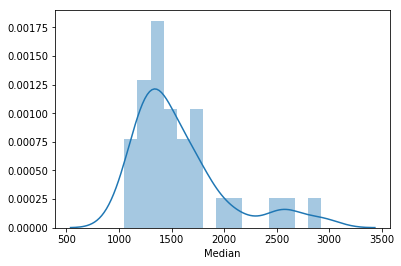

In [172]:
sns.distplot(frent['Median'],bins=15)

## Problem 2: Schools

##### The family has decided to chose the following Wards in London: City of London, Barking and Dagenham Barnet Bexley Brent Bromley Camden Croydon Ealing Enfield Greenwich Hackney Hammersmith and Fulham Haringey Harrow Havering Hillingdon Hounslow Islington Kensington and Chelsea Kingston upon Thames Lambeth Lewisham Merton Newham Redbridge Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest Wandsworth Westminster

##### Let's create a dataframe with:
###### - schools from these areas
###### - school ratings 

In [173]:
body = client_a45dc0d5df144c1b8084138592292515.get_object(Bucket='capstone-donotdelete-pr-zr9fcd12hojrew',Key='schools.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

schools = pd.read_csv(body)
schools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2017/18,All,2199,46.1,0.17
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
2,E09000004,Bexley,2017/18,All,3032,49.6,-0.1
3,E09000005,Brent,2017/18,All,2858,49.9,0.54
4,E09000006,Bromley,2017/18,All,3214,50.3,0.03


In [174]:
allschools = schools.loc[(schools['Year'] == '2017/18') & (schools['Sex'] == 'All')]

In [175]:
allschools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2017/18,All,2199,46.1,0.17
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
2,E09000004,Bexley,2017/18,All,3032,49.6,-0.1
3,E09000005,Brent,2017/18,All,2858,49.9,0.54
4,E09000006,Bromley,2017/18,All,3214,50.3,0.03


##### Let's sort by the Highest Attainment and select the first 5 Areas that have schools with the highest Attainment score

In [176]:
fschools = allschools.sort_values(by=['Attainment8'], ascending=False)

In [177]:
fschools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
27,E09000029,Sutton,2017/18,All,2719,58.1,0.39
19,E09000021,Kingston upon Thames,2017/18,All,1515,57.8,0.53
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
24,E09000026,Redbridge,2017/18,All,3508,53.1,0.47
31,E09000033,Westminster,2017/18,All,1495,52.9,0.47


##### Now we have 5 Areas for schoos with the Highest Attainment. Lets MERGE the two dataframes (Rent and Schools) and see what is the MEDIAN rent in these 5 Areas: Sutton, Kingston upon Thames, Barnet, Redbridge & Westminster

In [178]:
mergedsr = pd.merge(frent,
                 fschools[['Code', 'Attainment8']],
                 on='Code')
mergedsr.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8
0,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,1200,46.1
1,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0
2,2019,Q1,E09000004,Bexley,Two Bedroom,1050,49.6
3,2019,Q1,E09000005,Brent,Two Bedroom,1499,49.9
4,2019,Q1,E09000006,Bromley,Two Bedroom,1250,50.3


In [179]:
fmergedsr = mergedsr.sort_values(by=['Attainment8'], ascending=False)

In [180]:
fmergedsr.head(5)

,Year,Quarter,Code,Area,Category,Median,Attainment8
25,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1
17,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8
1,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0
22,2019,Q1,E09000026,Redbridge,Two Bedroom,1270,53.1
29,2019,Q1,E09000033,Westminster,Two Bedroom,2546,52.9


###### Westminster rent is twice higher than other areas. So the family decides to drop Westminster.

In [181]:
final1 = fmergedsr.loc[fmergedsr['Code'].isin(['E09000029','E09000021','E09000003','E09000026'])]

In [182]:
final1.shape

(4, 7)

In [192]:
final1.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8
25,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1
17,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8
1,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0
22,2019,Q1,E09000026,Redbridge,Two Bedroom,1270,53.1


##### Using the initial Dataset, let's see what other scores these four Areas have

In [183]:
scores = pd.merge(final1,
                 df_london[['Code', '% of pupils whose first language is not English (2015)','Happiness score 2011-14 (out of 10)','Anxiety score 2011-14 (out of 10)','Population density (per hectare) 2017','Crime rates per thousand population 2014/15']],
                 on='Code')
scores.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8,% of pupils whose first language is not English (2015),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Population density (per hectare) 2017,Crime rates per thousand population 2014/15
0,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1,34.3,7.3,3.2,46.2,55.9
1,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8,39.3,7.4,3.3,47.1,58.5
2,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0,46.0,7.4,2.8,44.9,62.7
3,2019,Q1,E09000026,Redbridge,Two Bedroom,1270,53.1,66.5,7.3,3.2,53.9,69.7


#### Based on this results the family makes a decision to drop Barnet and Redbridge due to higher Crime Rates and selects Sutton and Kingston upon Thames for further analysis.

## So thanks to the above analysis the family has now chosen Sutton and  Kingston upon Thames Areas that will be researched with Foursquare API further

In [184]:
body = client_a45dc0d5df144c1b8084138592292515.get_object(Bucket='capstone-donotdelete-pr-zr9fcd12hojrew',Key='SK.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
sk = pd.read_csv(body)
sk.head()


,Area,Latitude,Longitude
0,Sutton,51.3574,-0.1753
1,Kingston upon Thames,51.3781,-0.2927


In [185]:
final = pd.merge(scores,
                 sk[['Area', 'Latitude','Longitude']],
                 on='Area')
final.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8,% of pupils whose first language is not English (2015),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Population density (per hectare) 2017,Crime rates per thousand population 2014/15,Latitude,Longitude
0,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1,34.3,7.3,3.2,46.2,55.9,51.3574,-0.1753
1,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8,39.3,7.4,3.3,47.1,58.5,51.3781,-0.2927


In [186]:
CLIENT_ID = 'AJVRRHMYY3EEPYOZBIBNIVCSHPNNDGO50G0ZTYUEMJNWSTAB' # your Foursquare ID
CLIENT_SECRET = '1UCZY3IMQM02NFH0N3KPT2WWYH0UKVEVK2N0T2RKEWBKZIZP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AJVRRHMYY3EEPYOZBIBNIVCSHPNNDGO50G0ZTYUEMJNWSTAB
CLIENT_SECRET:1UCZY3IMQM02NFH0N3KPT2WWYH0UKVEVK2N0T2RKEWBKZIZP


In [187]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



### Lets explore the London Borough of Sutton with Foursquare API

In [188]:
latitudeS = 51.3575114
longitudeS = -0.173640122600872

In [190]:
address = 'London Borough of Sutton'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.3575114 -0.173640122600872


In [130]:
search_query = 'Chinese'
radius = 5000
print(search_query + ' .... OK!')

Chinese .... OK!


In [131]:
Surl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitudeS, longitudeS, VERSION, search_query, radius, LIMIT)
Surl

'https://api.foursquare.com/v2/venues/search?client_id=AJVRRHMYY3EEPYOZBIBNIVCSHPNNDGO50G0ZTYUEMJNWSTAB&client_secret=1UCZY3IMQM02NFH0N3KPT2WWYH0UKVEVK2N0T2RKEWBKZIZP&ll=51.3575114,-0.173640122600872&v=20180604&query=Chinese&radius=5000&limit=30'

In [132]:
import requests
Sresults = requests.get(Surl).json()
Sresults

{'meta': {'code': 200, 'requestId': '5e751404882fc7001b58c653'},
 'response': {'venues': [{'id': '4c7aac15df08a1cd2c7ade5d',
    'name': 'Friendly Chinese Take Away',
    'location': {'address': '1 The Broadway',
     'crossStreet': 'Lind Rd',
     'lat': 51.36371549526579,
     'lng': -0.18785802872961507,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.36371549526579,
       'lng': -0.18785802872961507}],
     'distance': 1205,
     'postalCode': 'SM1 4BU',
     'cc': 'GB',
     'city': 'Surrey',
     'state': 'Surrey',
     'country': 'United Kingdom',
     'formattedAddress': ['1 The Broadway (Lind Rd)',
      'Surrey',
      'SM1 4BU',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 

In [139]:
import json
from pandas.io.json import json_normalize

# assign relevant part of JSON to venues
venues = Sresults['response']['venues']

# tranform venues into a dataframe
sdf = json_normalize(venues)
sdf.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4c7aac15df08a1cd2c7ade5d,1 The Broadway,GB,Surrey,United Kingdom,Lind Rd,1205,"[1 The Broadway (Lind Rd), Surrey, SM1 4BU, Un...","[{'label': 'display', 'lat': 51.36371549526579...",51.363715,-0.187858,SM1 4BU,Surrey,Friendly Chinese Take Away,v-1584731333
1,"[{'id': '4d4b7105d754a06378d81259', 'name': 'S...",False,4de3f04db0fb267148a91336,1A Cheam Road,GB,Sutton,United Kingdom,NaN,1392,"[1A Cheam Road, Sutton, Greater London, United...","[{'label': 'display', 'lat': 51.361308, 'lng':...",51.361308,-0.192730,NaN,Greater London,Chinese Herbal Medicine And Health Care,v-1584731333
2,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4ce1410baba88cfa951b54d7,"544 Purley Way, Unit 2 Wing Yip Centre",GB,Croydon,United Kingdom,NaN,3843,"[544 Purley Way, Unit 2 Wing Yip Centre, Croyd...","[{'label': 'display', 'lat': 51.36282860279911...",51.362829,-0.119006,CR0 4NZ,Greater London,Tai Pan Chinese Bakery,v-1584731333
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4b8688b9f964a5205c8e31e3,94-96 Coombe Ln,GB,Raynes Park,United Kingdom,NaN,7148,"[94-96 Coombe Ln, Raynes Park, Greater London,...","[{'label': 'display', 'lat': 51.40964544829143...",51.409645,-0.233718,SW20 0AY,Greater London,Man's Chinese Cuisine,v-1584731333
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,51489810e4b07d65d924d60d,NaN,GB,NaN,United Kingdom,NaN,2080,[United Kingdom],"[{'label': 'display', 'lat': 51.35877, 'lng': ...",51.358770,-0.143780,NaN,NaN,Hoo Hing Chinese,v-1584731333


In [141]:
sdf.shape

(24, 17)

### Lets explore the Royal Borough of Kingston upon Thames with Foursquare API

In [134]:
address = 'Royal Borough of Kingston upon Thames'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.38177625 -0.2769872337016633


In [136]:
latitudeK = 51.38177625
longitudeK = -0.2769872337016633

In [137]:
Kurl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitudeK, longitudeK, VERSION, search_query, radius, LIMIT)
Kurl

'https://api.foursquare.com/v2/venues/search?client_id=AJVRRHMYY3EEPYOZBIBNIVCSHPNNDGO50G0ZTYUEMJNWSTAB&client_secret=1UCZY3IMQM02NFH0N3KPT2WWYH0UKVEVK2N0T2RKEWBKZIZP&ll=51.38177625,-0.2769872337016633&v=20180604&query=Chinese&radius=5000&limit=30'

In [138]:
Kresults = requests.get(Kurl).json()
Kresults

{'meta': {'code': 200, 'requestId': '5e7514a5d03993001b90f448'},
 'response': {'venues': [{'id': '4b8688b9f964a5205c8e31e3',
    'name': "Man's Chinese Cuisine",
    'location': {'address': '94-96 Coombe Ln',
     'lat': 51.40964544829143,
     'lng': -0.23371812536249667,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.40964544829143,
       'lng': -0.23371812536249667}],
     'distance': 4319,
     'postalCode': 'SW20 0AY',
     'cc': 'GB',
     'city': 'Raynes Park',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['94-96 Coombe Ln',
      'Raynes Park',
      'Greater London',
      'SW20 0AY',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 

In [144]:
# assign relevant part of JSON to venues
venues = Kresults['response']['venues']

# tranform venues into a dataframe
kdf = json_normalize(venues)
kdf.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4b8688b9f964a5205c8e31e3,94-96 Coombe Ln,GB,Raynes Park,United Kingdom,NaN,4319,"[94-96 Coombe Ln, Raynes Park, Greater London,...","[{'label': 'display', 'lat': 51.40964544829143...",51.409645,-0.233718,SW20 0AY,Greater London,Man's Chinese Cuisine,v-1584731370
1,[],False,4dd52b7bae60a78cec66e908,"112 ewell road, surbiton",GB,Surrey,United Kingdom,NaN,2211,"[112 ewell road, surbiton, Surrey, United King...","[{'label': 'display', 'lat': 51.372312, 'lng':...",51.372312,-0.304975,NaN,Surrey,Chinese medical centre,v-1584731370
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4f70ef01c2eee76199ca1b3c,59-63 Brighton Road,GB,Surbiton,United Kingdom,NaN,2607,"[59-63 Brighton Road, Surbiton, Greater London...","[{'label': 'display', 'lat': 51.39193452541135...",51.391935,-0.310813,KT6 5LR,Greater London,Naturally Chinese Restaurant,v-1584731370
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4e973c345503e24777ee33fa,Berrylands Road,GB,Kingston,United Kingdom,NaN,1819,"[Berrylands Road, Kingston, Greater London, Un...","[{'label': 'display', 'lat': 51.393139, 'lng':...",51.393139,-0.295821,NaN,Greater London,Surbiton Chinese,v-1584731370
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,51534c21e4b00614d7c93b7d,159 surbiton Hill Park,GB,Surrey,United Kingdom,NaN,1850,"[159 surbiton Hill Park, Surrey, Kt5 8ej, Unit...","[{'label': 'display', 'lat': 51.39785641960332...",51.397856,-0.283744,Kt5 8ej,Surrey,New Kam Tong Chinese Takeaway,v-1584731370


In [142]:
kdf.shape

(21, 17)

In [152]:
fsdf = sdf.filter(['name','location.city','location.lat','location.lng'], axis=1)
fsdf

,name,location.city,location.lat,location.lng
0,Friendly Chinese Take Away,Surrey,51.363715,-0.187858
1,Chinese Herbal Medicine And Health Care,Sutton,51.361308,-0.192730
2,Tai Pan Chinese Bakery,Croydon,51.362829,-0.119006
3,Man's Chinese Cuisine,Raynes Park,51.409645,-0.233718
4,Hoo Hing Chinese,NaN,51.358770,-0.143780
5,Sunny Bay Chinese Takeaway,Surrey,51.368013,-0.200223
6,Sunny Bay Chinese Takeaway,Surrey,51.367949,-0.200329
7,Choo Chinese Takeaway,NaN,51.383722,-0.173068
8,Chinese Express,Surrey,51.383928,-0.098233
9,Tai Tung Chinese Restaurant,Croydon,51.362799,-0.119078


In [153]:
fkdf = kdf.filter(['name','location.city','location.lat','location.lng'], axis=1)
fkdf

,name,location.city,location.lat,location.lng
0,Man's Chinese Cuisine,Raynes Park,51.409645,-0.233718
1,Chinese medical centre,Surrey,51.372312,-0.304975
2,Naturally Chinese Restaurant,Surbiton,51.391935,-0.310813
3,Surbiton Chinese,Kingston,51.393139,-0.295821
4,New Kam Tong Chinese Takeaway,Surrey,51.397856,-0.283744
5,Chinese Fish & Chips,Kingston,51.418571,-0.297180
6,contemporary chinese therapy,NaN,51.391447,-0.308726
7,New Malden Chinese and Malaysian,New Malden,51.401010,-0.265369
8,Masters Chinese Canteen,Sutton,51.378328,-0.239180
9,melbourne chinese take away,Surrey,51.415723,-0.285301


In [159]:
london = folium.Map(location=[51.5073219, -0.1276474],
                    tiles='Stamen Toner',
                    zoom_start=10)

# add FSDF markers to map 
for lat, lng, label in zip(fsdf ['location.lat'], fsdf ['location.lng'], fsdf['name'] ):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london) 
    
# add FKDF markers to map
for lat, lng, label in zip(fkdf ['location.lat'], fkdf ['location.lng'], fkdf['name'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(london) 
    
london

#### After exploring the map, the family has decided to start looking for a house in the Sutton Area.